In [1]:
import os
import keras
from keras import layers
from keras import models
from encode import DataSet
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.utils import plot_model

img_path = '/Users/seino/Documents/research/DeepLearning/playground/img/one'
height, width, channels = 32, 32, 3
num_classes = 32

ds = DataSet(img_path)
b = ds.make_digit()
c = ds.k_hot_encode()
x_train, x_test, y_train, y_test = ds.like_mnist(b,c, 0.2)

Using TensorFlow backend.


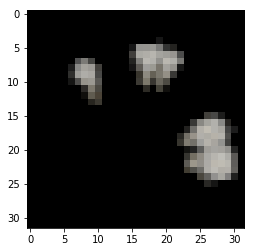

In [9]:
plt.imshow(x_train[0])

W0828 14:38:04.330862 4455196096 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 14:38:04.337694 4455196096 deprecation.py:506] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0828 14:38:04.523789 4455196096 deprecation.py:323] From /Users/seino/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast r

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 32)        155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 5, 5, 64)          4736      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 3, 3, 128)         8896      
__________

W0828 14:38:06.661244 4455196096 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0828 14:38:06.683001 4455196096 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0828 14:38:06.918087 4455196096 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0828 14:38:06.924386 4455196096 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



Train on 22650 samples, validate on 5663 samples
Epoch 1/10
22650/22650 [==============================] - 32s 1ms/step - loss: 0.5397 - acc: 0.7624 - val_loss: 0.5313 - val_acc: 0.7647
Epoch 2/10
22650/22650 [==============================] - 30s 1ms/step - loss: 0.4395 - acc: 0.7698 - val_loss: 0.4025 - val_acc: 0.7733
Epoch 3/10
22650/22650 [==============================] - 30s 1ms/step - loss: 0.3648 - acc: 0.7802 - val_loss: 0.3624 - val_acc: 0.7794
Epoch 4/10
22650/22650 [==============================] - 31s 1ms/step - loss: 0.3296 - acc: 0.7942 - val_loss: 0.3580 - val_acc: 0.7871
Epoch 5/10
22650/22650 [==============================] - 30s 1ms/step - loss: 0.3103 - acc: 0.8100 - val_loss: 0.3004 - val_acc: 0.8241
Epoch 6/10
22650/22650 [==============================] - 31s 1ms/step - loss: 0.2886 - acc: 0.8315 - val_loss: 0.2852 - val_acc: 0.8446
Epoch 7/10
22650/22650 [==============================] - 31s 1ms/step - loss: 0.2670 - acc: 0.8495 - val_loss: 0.2679 - val_acc:

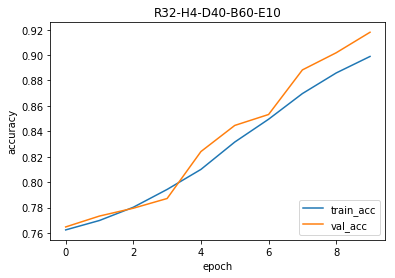

In [4]:
# paramaters
hidden_units = 4 #1 is baseline
input_param = 32 #32 is baseline
dropout_rate = 0.4 #0.1 is baseline
batch_p = 60 #100 is baseline
epoch_p = 10 #10 is baseline

model = models.Sequential()
model.add(layers.SeparableConv2D(input_param, 3, activation='relu', input_shape=(height, width, channels)))
model.add(layers.SeparableConv2D(input_param*2, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(dropout_rate))

model.add(layers.MaxPooling2D(2))
model.add(layers.SeparableConv2D(input_param*2, 3, activation='relu'))
model.add(layers.SeparableConv2D(input_param*4, 3, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(input_param*2, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

model_arch_name = 'R'+str(input_param)+'-H'+str(hidden_units)+'-D'+str(int(dropout_rate*100))+'-B'+str(batch_p)+'-E'+str(epoch_p)                                                                        
plot_model(model, show_shapes=True, to_file='./analysis/'+model_arch_name+'.png')

history = model.fit(x_train, y_train, batch_size=batch_p, epochs=epoch_p, validation_data=(x_test, y_test), verbose=1)

model.save('./save_models/'+model_arch_name+'.h5')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(model_arch_name)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.savefig('./analysis/acc_'+model_arch_name+'.png')
plt.show()